<a href="https://colab.research.google.com/github/otakmager/KTP-CS344-CUDA/blob/master/ProblemSet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 👷‍♂️ Anggota Kelompok:
1. Dimas Wahyu Ardiyanto 24060120140159
2. Muhammad Hafizh Roihan 24060120130123

## 📑 Menyiapkan Environment & Instalasi CUDA

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2022-11-17 13:43:49--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.20.126
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/downloads/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2022-11-17 13:43:50--  https://developer.nvidia.com/downloads/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?6QIYpMsrPoJFmNqHcDfkF3P9uU3mkcmLFKywYoFMSaODgiposQs4G34aSQfurT9eKJbrp90TCuxvOVXESqfx4BAY6

## 🔎 Mengecek Versi CUDA yang Terinstal

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


## 🧱 Menyiapkan Resource untuk Komputasi lewat Cloud Repository
- Repositori KTP-CS344-CUDA berisikan file untuk programming dan resouce lain seperti image yang akan digunakan
- Repositori NVCC4Jupyter berisikan plugin untuk menjalankan CUDA C/C++ di Jupyter Notebook ataupun Colab
- Menyiapkan directory tambahan untuk tempat build program

In [ ]:
# Homework 2 for Udacity CS344 Course, Intro to Parallel Programming
# clone the code repo
!git clone https://github.com/otakmager/KTP-CS344-CUDA
!pip install git+https://github.com/otakmager/nvcc4jupyter.git

# load cuda plugin
%config NVCCPluginV2.static_dir = True
%config NVCCPluginV2.relative_dir = "KTP-CS344-CUDA/src/HW2"
%load_ext nvcc_plugin

# change to work directory, generate makefiles
!mkdir KTP-CS344-CUDA/build
%cd KTP-CS344-CUDA/build
!cmake ../src

Cloning into 'KTP-CS344-CUDA'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 37 (delta 3), reused 37 (delta 3), pack-reused 0
Unpacking objects: 100% (37/37), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/otakmager/nvcc4jupyter.git to /tmp/pip-req-build-2xxzvyk3
  Running command git clone -q https://github.com/otakmager/nvcc4jupyter.git /tmp/pip-req-build-2xxzvyk3
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4332 sha256=dc08107bb21495caa94a62b5526beb96650d6ebd14137f69cc64eae70acac016
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ak9095n/wheels/81/53/5d/7a6afe3cdf984149ccc4203fa05d7c1f0126185d0de61747fc
Successfully built NVCCPlugin
Set up cuda environment at /content/KTP-CS344-CUDA/src/HW2
Default out bin result.out
/content/KTP-CS344-CUDA/build
CMake Depre

## Function untuk Blur Image
- Code di bawah ini adalah code program yang berguna untuk memberikan efek blur pada sebuah image
- %%cuda --name student_func.cu berguna untuk menjalankan CUDA sekaligus diberikan nama file 
- Secara garis besar, function ini menggunakan prinsip konvulasi yang mengalikan matriks persegi dengan matriks gambar yang berisikan n intensitas warna pada setiap piksel di dalam gambar
- Prosedur dalam function blur ini antara lain:
  1. void gaussian_blur:()
```
 Menyiapkan operasi konvulasi
 Menyiapkan data dalam shared memory untuk urusan parallel
 Melakukan konvulasi
 ```

  2. void separateChannels()
```
Membagi channel warna gambar menjadi 3 channel warna sendiri-sendiri
 ```

  3. void recombineChannels()
```
Mengabungkan kembali channel warna gambar setelah konvulasi
 ```

  4. void allocateMemoryAndCopyToGPU()
```
Menyiapkan alokasi memori untuk setiap channel warna sesuai ukuran dimensi matriks gambar 
Melakukan copy data ke GPU
 ```

  5. void your_gaussian_blur()
```
Menyiapkan ukuran block dan grid untuk thread yang akan dikerjakan
Memanggil prosedur untuk membagi channel warna gambar
Melakukan konvulasi dengan gaussian blur
Menggabungkan kembali channel gambar dan menyimpan hasilnya
 ```

  6. void cleanup()
```
Membebaskan memori yang telah digunakan
 ```

- Function ini akan dipanggil di main function (main.cpp)

In [ ]:
%%cuda --name student_func.cu

// Homework 2
// Image Blurring
//
// In this homework we are blurring an image. To do this, imagine that we have
// a square array of weight values. For each pixel in the image, imagine that we
// overlay this square array of weights on top of the image such that the center
// of the weight array is aligned with the current pixel. To compute a blurred
// pixel value, we multiply each pair of numbers that line up. In other words, we
// multiply each weight with the pixel underneath it. Finally, we add up all of the
// multiplied numbers and assign that value to our output for the current pixel.
// We repeat this process for all the pixels in the image.

// To help get you started, we have included some useful notes here.

//****************************************************************************

// For a color image that has multiple channels, we suggest separating
// the different color channels so that each color is stored contiguously
// instead of being interleaved. This will simplify your code.

// That is instead of RGBARGBARGBARGBA... we suggest transforming to three
// arrays (as in the previous homework we ignore the alpha channel again):
//  1) RRRRRRRR...
//  2) GGGGGGGG...
//  3) BBBBBBBB...
//
// The original layout is known an Array of Structures (AoS) whereas the
// format we are converting to is known as a Structure of Arrays (SoA).

// As a warm-up, we will ask you to write the kernel that performs this
// separation. You should then write the "meat" of the assignment,
// which is the kernel that performs the actual blur. We provide code that
// re-combines your blurred results for each color channel.

//****************************************************************************

// You must fill in the gaussian_blur kernel to perform the blurring of the
// inputChannel, using the array of weights, and put the result in the outputChannel.

// Here is an example of computing a blur, using a weighted average, for a single
// pixel in a small image.
//
// Array of weights:
//
//  0.0  0.2  0.0
//  0.2  0.2  0.2
//  0.0  0.2  0.0
//
// Image (note that we align the array of weights to the center of the box):
//
//    1  2  5  2  0  3
//       -------
//    3 |2  5  1| 6  0       0.0*2 + 0.2*5 + 0.0*1 +
//      |       |
//    4 |3  6  2| 1  4   ->  0.2*3 + 0.2*6 + 0.2*2 +   ->  3.2
//      |       |
//    0 |4  0  3| 4  2       0.0*4 + 0.2*0 + 0.0*3
//       -------
//    9  6  5  0  3  9
//
//         (1)                         (2)                 (3)
//
// A good starting place is to map each thread to a pixel as you have before.
// Then every thread can perform steps 2 and 3 in the diagram above
// completely independently of one another.

// Note that the array of weights is square, so its height is the same as its width.
// We refer to the array of weights as a filter, and we refer to its width with the
// variable filterWidth.

//****************************************************************************

// Your homework submission will be evaluated based on correctness and speed.
// We test each pixel against a reference solution. If any pixel differs by
// more than some small threshold value, the system will tell you that your
// solution is incorrect, and it will let you try again.

// Once you have gotten that working correctly, then you can think about using
// shared memory and having the threads cooperate to achieve better performance.

//****************************************************************************

// Also note that we've supplied a helpful debugging function called checkCudaErrors.
// You should wrap your allocation and copying statements like we've done in the
// code we're supplying you. Here is an example of the unsafe way to allocate
// memory on the GPU:
//
// cudaMalloc(&d_red, sizeof(unsigned char) * numRows * numCols);
//
// Here is an example of the safe way to do the same thing:
//
// checkCudaErrors(cudaMalloc(&d_red, sizeof(unsigned char) * numRows * numCols));
//
// Writing code the safe way requires slightly more typing, but is very helpful for
// catching mistakes. If you write code the unsafe way and you make a mistake, then
// any subsequent kernels won't compute anything, and it will be hard to figure out
// why. Writing code the safe way will inform you as soon as you make a mistake.

// Finally, remember to free the memory you allocate at the end of the function.

//****************************************************************************

#include "utils.h"

#define O_TILE_WIDTH 8
#define BLOCK_WIDTH (O_TILE_WIDTH + 8)


__global__
void gaussian_blur(const unsigned char* const inputChannel,
                   unsigned char* const outputChannel,
                   int numRows, int numCols,
                   const float* const filter, const int filterWidth)
{
  // TODO
  
  // NOTE: Be sure to compute any intermediate results in floating point
  // before storing the final result as unsigned char.

  // NOTE: Be careful not to try to access memory that is outside the bounds of
  // the image. You'll want code that performs the following check before accessing
  // GPU memory:
  //
  // if ( absolute_image_position_x >= numCols ||
  //      absolute_image_position_y >= numRows )
  // {
  //     return;
  // }
  
  // NOTE: If a thread's absolute position 2D position is within the image, but some of
  // its neighbors are outside the image, then you will need to be extra careful. Instead
  // of trying to read such a neighbor value from GPU memory (which won't work because
  // the value is out of bounds), you should explicitly clamp the neighbor values you read
  // to be within the bounds of the image. If this is not clear to you, then please refer
  // to sequential reference solution for the exact clamping semantics you should follow.


  
	// Note: this operation is kind of convolution
	int tx = threadIdx.x;
	int ty = threadIdx.y;
	int row_o = blockIdx.y*O_TILE_WIDTH + ty;
	int col_o = blockIdx.x*O_TILE_WIDTH + tx;

	// We need load more data into shared memory to do calculation
	// we need load (O_TILE_WIDTH + filterWidth-1)^2  data into shared memeory, filterWidth is 9 here
	// to calculate an output at row_o, we should begin at row_o-(filterWidth/2)
	int row_i = row_o - 4;
	int col_i = col_o - 4;

	// Fast memory access
	// load all data into shared memory
	__shared__ float Ns[BLOCK_WIDTH][BLOCK_WIDTH];
	//clamp to boundary of the image
	row_i = min(max(row_i,0),numRows-1);
	col_i = min(max(col_i,0),numCols-1);
	int offset = row_i*numCols + col_i;
	Ns[ty][tx]  =  inputChannel[offset];

	
	// make sure that all needed data are loaded into shared memory
	__syncthreads();
	
	// do calculation, only O_TILE_WIDTH*O_TILE_WIDTH threads participate in calculating outputs
    // only safe threads participate in writing output
	float data = 0.0f;
	if( tx < O_TILE_WIDTH && ty < O_TILE_WIDTH && row_o < numRows && col_o < numCols){

		for(int i = 0; i < filterWidth; i++)
			for(int j = 0; j < filterWidth; j++)
				data += filter[i*filterWidth+j] * Ns[i+ty][j+tx];
		
		//if(row_o < numRows && col_o < numCols)
			outputChannel[row_o*numCols+col_o] = data;
	}
	
}

//This kernel takes in an image represented as a uchar4 and splits
//it into three images consisting of only one color channel each
__global__
void separateChannels(const uchar4* const inputImageRGBA,
                      int numRows,
                      int numCols,
                      unsigned char* const redChannel,
                      unsigned char* const greenChannel,
                      unsigned char* const blueChannel)
{
  // TODO
  //
  // NOTE: Be careful not to try to access memory that is outside the bounds of
  // the image. You'll want code that performs the following check before accessing
  // GPU memory:
  //
  // if ( absolute_image_position_x >= numCols ||
  //      absolute_image_position_y >= numRows )
  // {
  //     return;
  // }
  
	int row = blockIdx.y*O_TILE_WIDTH + threadIdx.y;
	int col = blockIdx.x*O_TILE_WIDTH + threadIdx.x;
	// do calculation, only O_TILE_WIDTH*O_TILE_WIDTH threads participate in calculating outputs
	// only safe threads participate in writing output
	if( threadIdx.y < O_TILE_WIDTH && threadIdx.x < O_TILE_WIDTH &&  (row < numRows) && (col < numCols) ){
		// Note: this operation is kind of transpose pattern

		// we set block number and size under the 1-channel position, so each thread should load 3 elements
		// ignore the 4th channel (alpha value)
		int offset = row*numCols + col;
		redChannel[offset]   =  inputImageRGBA[offset].x;
		greenChannel[offset] =  inputImageRGBA[offset].y;
		blueChannel[offset]  =  inputImageRGBA[offset].z;
	}
  
}

//This kernel takes in three color channels and recombines them
//into one image.  The alpha channel is set to 255 to represent
//that this image has no transparency.
__global__
void recombineChannels(const unsigned char* const redChannel,
                       const unsigned char* const greenChannel,
                       const unsigned char* const blueChannel,
                       uchar4* const outputImageRGBA,
                       int numRows,
                       int numCols)
{
	int row = blockIdx.y*O_TILE_WIDTH + threadIdx.y;
	int col = blockIdx.x*O_TILE_WIDTH + threadIdx.x;
	// do calculation, only O_TILE_WIDTH*O_TILE_WIDTH threads participate in calculating outputs
	// only safe threads participate in writing output
	if( threadIdx.y < O_TILE_WIDTH && threadIdx.x < O_TILE_WIDTH && (row < numRows) && (col < numCols) ){
		// Note: this operation is kind of transpose pattern
		const int thread_1D_pos = row*numCols + col;

		unsigned char red   = redChannel[thread_1D_pos];
		unsigned char green = greenChannel[thread_1D_pos];
		unsigned char blue  = blueChannel[thread_1D_pos];

		//Alpha should be 255 for no transparency
		uchar4 outputPixel = make_uchar4(red, green, blue, 255);

		outputImageRGBA[thread_1D_pos] = outputPixel;
	}

}

unsigned char *d_red, *d_green, *d_blue;
float         *d_filter;

void allocateMemoryAndCopyToGPU(const size_t numRowsImage, const size_t numColsImage,
                                const float* const h_filter, const size_t filterWidth)
{

  //allocate memory for the three different channels
  //original
  checkCudaErrors(cudaMalloc(&d_red,   sizeof(unsigned char) * numRowsImage * numColsImage));
  checkCudaErrors(cudaMalloc(&d_green, sizeof(unsigned char) * numRowsImage * numColsImage));
  checkCudaErrors(cudaMalloc(&d_blue,  sizeof(unsigned char) * numRowsImage * numColsImage));

  //TODO:
  //Allocate memory for the filter on the GPU
  //Use the pointer d_filter that we have already declared for you
  //You need to allocate memory for the filter with cudaMalloc
  //be sure to use checkCudaErrors like the above examples to
  //be able to tell if anything goes wrong
  //IMPORTANT: Notice that we pass a pointer to a pointer to cudaMalloc

  checkCudaErrors(cudaMalloc(&d_filter, sizeof(float) * filterWidth * filterWidth));

  //TODO:
  //Copy the filter on the host (h_filter) to the memory you just allocated
  //on the GPU.  cudaMemcpy(dst, src, numBytes, cudaMemcpyHostToDevice);
  //Remember to use checkCudaErrors!
  checkCudaErrors(cudaMemcpy(d_filter, h_filter, sizeof(float) * filterWidth * filterWidth, cudaMemcpyHostToDevice));

}

void your_gaussian_blur(const uchar4 * const h_inputImageRGBA, uchar4 * const d_inputImageRGBA,
                        uchar4* const d_outputImageRGBA, const size_t numRows, const size_t numCols,
                        unsigned char *d_redBlurred, 
                        unsigned char *d_greenBlurred, 
                        unsigned char *d_blueBlurred,
                        const int filterWidth)
{
  //TODO: Set reasonable block size (i.e., number of threads per block)

	  // consider this as 2-D convolution operation with 2-D MASK, here i used tile-convolution
	  // We need load enough elements into shared memory in kernel function, so the width of one block is the tile width + mask with - 1
	  const dim3 blockSize(BLOCK_WIDTH,BLOCK_WIDTH);

  //TODO:
  //Compute correct grid size (i.e., number of blocks per kernel launch)
  //from the image size and and block size.

	  // We need enough block to cover all pixels in a image
	  const dim3 gridSize( numCols/O_TILE_WIDTH+1, numRows/O_TILE_WIDTH+1, 1);


  //TODO: Launch a kernel for separating the RGBA image into different color channels

  	separateChannels<<<gridSize, blockSize>>>(d_inputImageRGBA, numRows, numCols, d_red, d_green, d_blue);
  
  // Call cudaDeviceSynchronize(), then call checkCudaErrors() immediately after
  // launching your kernel to make sure that you didn't make any mistakes.
  cudaDeviceSynchronize(); checkCudaErrors(cudaGetLastError());

  //TODO: Call your convolution kernel here 3 times, once for each color channel.
  
	  gaussian_blur<<<gridSize, blockSize>>>(d_red, d_redBlurred, numRows, numCols, d_filter, filterWidth);

	  gaussian_blur<<<gridSize, blockSize>>>(d_green, d_greenBlurred, numRows, numCols, d_filter, filterWidth);

	  gaussian_blur<<<gridSize, blockSize>>>(d_blue, d_blueBlurred, numRows, numCols, d_filter, filterWidth);


  // Again, call cudaDeviceSynchronize(), then call checkCudaErrors() immediately after
  // launching your kernel to make sure that you didn't make any mistakes.
  cudaDeviceSynchronize(); checkCudaErrors(cudaGetLastError());

  // Now we recombine your results. We take care of launching this kernel for you.
  //
  // NOTE: This kernel launch depends on the gridSize and blockSize variables,
  // which you must set yourself.
  recombineChannels<<<gridSize, blockSize>>>(d_redBlurred,
                                             d_greenBlurred,
                                             d_blueBlurred,
                                             d_outputImageRGBA,
                                             numRows,
                                             numCols);
  cudaDeviceSynchronize(); checkCudaErrors(cudaGetLastError());

}


//Free all the memory that we allocated
//TODO: make sure you free any arrays that you allocated
void cleanup() {
  checkCudaErrors(cudaFree(d_red));
  checkCudaErrors(cudaFree(d_green));
  checkCudaErrors(cudaFree(d_blue));

	// free filter memory
	checkCudaErrors(cudaFree(d_filter));
}

'File written in /content/KTP-CS344-CUDA/src/HW2/student_func.cu'

## ⚡ Menjalankan Project CUDA 
- Membuat folder HW2 untuk menyimpan hasil komputasi
- Menjalankan program yang terdapat pada folder bin dengan target gambar cinque_terre_small.jpg 

In [ ]:
# make the cuda project
!make HW2
print("\n====== RESULT OF HW2 =======\n")

!bin/HW2 ../src/HW2/cinque_terre_small.jpg

[ 20%] Building NVCC (Device) object HW2/CMakeFiles/HW2.dir/HW2_generated_student_func.cu.o
[ 40%] Building CXX object HW2/CMakeFiles/HW2.dir/main.cpp.o
[ 60%] Building CXX object HW2/CMakeFiles/HW2.dir/reference_calc.cpp.o
[ 80%] Building CXX object HW2/CMakeFiles/HW2.dir/compare.cpp.o
[100%] Linking CXX executable ../bin/HW2
[100%] Built target HW2

====== RESULT OF HW2 =======

Your code ran in: 10.218816 msecs.
PASS


## 📺 Menampilkan dan Memberikan Gambaran Perbandingan Ouput Project

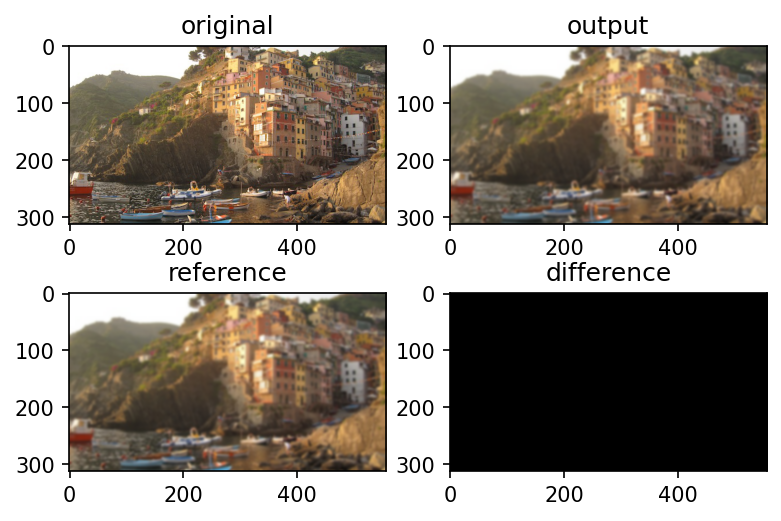

In [ ]:
# plot output images
import matplotlib.pyplot as plt
_,ax = plt.subplots(2,2, dpi=150)

ax[0][0].imshow(plt.imread("../src/HW2/cinque_terre_small.jpg"))
ax[0][0].set_title("original")
ax[0][0].grid(False)

ax[0][1].imshow(plt.imread("HW2_output.png"))
ax[0][1].set_title("output")
ax[0][1].grid(False)

ax[1][0].imshow(plt.imread("HW2_reference.png"))
ax[1][0].set_title("reference")
ax[1][0].grid(False)

ax[1][1].imshow(plt.imread("HW2_differenceImage.png"))
ax[1][1].set_title("difference")
ax[1][1].grid(False)

plt.show()

## 🏁🏁 SELESAI 🏁🏁